In [1]:
# pandas for data manipulation and analysis
import pandas as pd
# numpy to manipulate multi-dimensional arrays and matrices
import numpy as np
# re - regex to provides regular expression matching operations
import re
# the OS module in Python provides a way of using operating system dependent functionality
import os
# the requests module allows you to send HTTP requests using Python
import requests
# python-dotenv to read the key-value pair from . env file and adds them to environment variable.
from dotenv import load_dotenv
#Beautiful Soup is a Python library for pulling data out of HTML and XML files
from bs4 import BeautifulSoup
# The selenium package is used to automate web browser interaction from Python
from selenium import webdriver
# to simplify management of binary drivers for different browsers
#import chromedriver_binary 
from webdriver_manager.chrome import ChromeDriverManager

# Import Dataset from Kaggle

In [2]:
df = pd.read_csv('inputs/datasets_Nba_Players.csv', encoding = 'latin-1')

In [3]:
df.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [4]:
# Generate descriptive statistics.
#Descriptive statistics include those that summarize the central tendency, 
#dispersion and shape of a dataset’s distribution, excluding NaN values.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3922.0,1960.500000,1132.328206,0.0,980.25,1960.5,2940.75,3921.0
height,3921.0,198.704922,9.269761,160.0,190.00,198.0,206.00,231.0
weight,3921.0,94.783219,12.039515,60.0,86.00,95.0,102.00,163.0
born,3921.0,1962.379750,20.334910,1913.0,1948.00,1964.0,1979.00,1997.0


In [5]:
# Return a tuple representing the dimensionality of the DataFrame
df.shape

(3922, 8)

In [6]:
# The column labels of the DataFrame
df.columns

Index(['Unnamed: 0', 'Player', 'height', 'weight', 'collage', 'born',
       'birth_city', 'birth_state'],
      dtype='object')

In [7]:
# Detect missing values. Return a boolean output
df.isnull().sum().sort_values(ascending=False).head(5)

birth_state    483
birth_city     470
collage        349
born             1
weight           1
dtype: int64

In [8]:
# Remove row where all values are None- No hace falta
#df = df.dropna(how='all')

# API
https://probasketballapi.com/docs/v2/teams

In [9]:
load_dotenv()

True

In [10]:
apikey = os.getenv("APIKEY")

In [11]:
#print(apikey)

In [12]:
# enviar una request. Si sale un numero que empieza con 2 todo bien, 
# o si no ver los errores de los gatos a ver que dicen!
url = 'http://api.probasketballapi.com/player'
res = requests.post(url)
res

<Response [200]>

In [13]:
query = {'api_key': f'{apikey}', 'first_name':'Lebron', 'last_name':'James'} 
r = requests.post(url, data=query)

In [14]:
player_api =r.json()[0]

In [15]:
table_api = pd.DataFrame(player_api, index=[0])

In [16]:
table_api.head()

,id,team_id,player_name,first_name,last_name,birth_date,position,dk_position,dk_id
0,2544,1610612739,LeBron James,LeBron,James,1984-12-30,Forward,SF,214152


### With the API they only get some more information about the players, such as the position on the pitch, and the complete date of birth.
With different queries, however, *I can get information on the player's performance in a specific game.*
The object of the analysis, however, is to compare the stats of two players, so **let's try to get this data through selenium**.

# SELENIUM AND WEB SCRAPING

In [17]:
def getPage(url):
    # This function show a basic way to make a get requests used Selenium
    # First line to to avoid this error:
    # WebDriverException: Message: 'chromedriver' executable needs to be available in the path.
    # driver.execute_script(..) to scroll the page in Selenium untill the bottom
    driver = webdriver.Chrome(ChromeDriverManager().install())
    driver.get(url)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    html = driver.page_source
    soup = BeautifulSoup(html)
    driver.quit()
    return soup

In [21]:
# Example with Lebron James stats
soup = getPage("https://stats.nba.com/player/2544/")

[WDM] - Current google-chrome version is 81.0.4044
[WDM] - Get LATEST driver version for 81.0.4044


[WDM] - Driver [/home/must4in3/.wdm/drivers/chromedriver/linux64/81.0.4044.138/chromedriver] found in cache


In [22]:
#soup

In [23]:
# different way to scraping the webpabge, using CSS selector or tags
# Ex.1 - just columns name
columnas = [table.text.split() for table in soup.select("thead")]
# Ex.2 - all value in the table
lenght = [table.text.split() for table in soup.select("tbody")]
row = [table.text.split() for table in soup.select("tbody > tr")]
# I use the years variable to store the information of the athlete's years of activity, 
#which is different for each athlete. This way I can create a generic scraping that works for most players
years = len(lenght[1])
print(years)

17


In [24]:
# 5 dictionaries, each for each table
Traditional_Splits  = dict()
Advanced_Splits = dict()
Misc_Splits = dict()
Scoring_Splits = dict()
Usage_Splits = dict() 

# clean the variable from unnecessary fields, to facilitate the process of creating dictionaries
new_row = []
for x in row:
    if len(x)>1:
        new_row.append(x)

def creacolumnas(columnas, empty_dict):
    # this function allows you to create the keys of each dictionary
    for column in columnas:
        empty_dict[column] = []  
        
def creafilas(row, numpari, empty_dict):
    # this function allows you to fill the data tables
    for i,value in enumerate(empty_dict.keys()):
        for x in range(years):
            try:
                empty_dict[value].append(row[x+(numpari*years)][i])
            except:
                pass

# Two types of data depending on the players


On the web, data are organized in different ways. The active players have 5 tables of statistics while almost all the players no longer in activity have only 4 tables, which report distinct data (table 4 is not reported because it is not very interesting for statistical purposes.

For this reason there are two types of filtering of the columns, so as not to cause errors when downloading data

## Recent players

<img src="https://a.espncdn.com/i/headshots/nba/players/full/1966.png" width=300 style=left>

In [25]:
# an additional procedure for cleaning the keys that will be inserted in each dictionary
columnas_tabla1 =columnas[0][1::]
columnas_tabla2 =columnas[2][1:11] + columnas[2][13::]
columnas_tabla3 =columnas[4][1:5] + columnas[4][6:7] + columnas[4][8:9] + columnas[4][10:13] + columnas[4][15:16] + columnas[4][17::]
columnas_tabla4 =columnas[6][1:9] + columnas[6][10::]
columnas_tabla4[7] = '%PTS2PTMR'
columnas_tabla5 = columnas[8][1::]
# a print example
print(columnas_tabla1)

['Year', 'TEAM', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-']


In [26]:
# call the functions previously created for each table
creacolumnas(columnas_tabla1, Traditional_Splits )
creafilas(new_row, 0, Traditional_Splits )
#print(Traditional_Splits)
creacolumnas(columnas_tabla2, Advanced_Splits )
creafilas(new_row, 1, Advanced_Splits )
#print(Advanced_Splits)
creacolumnas(columnas_tabla3, Misc_Splits )
creafilas(new_row, 2, Misc_Splits )
#print(Misc_Splits)
creacolumnas(columnas_tabla4, Scoring_Splits )
creafilas(new_row, 3, Scoring_Splits )
#print(Scoring_Splits)
creacolumnas(columnas_tabla5, Usage_Splits )
creafilas(new_row, 4, Usage_Splits )
#print(Usage_Splits)

In [27]:
table1 = pd.DataFrame(Traditional_Splits)
table1.head()

,Year,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,2019-20,LAL,60,34.9,25.7,9.8,19.6,49.8,2.2,6.4,...,7.9,10.6,4.0,1.2,0.5,1.8,52.3,42,13,8.1
1,2018-19,LAL,55,35.2,27.4,10.1,19.9,51.0,2.0,5.9,...,8.5,8.3,3.6,1.3,0.6,1.7,52.0,32,8,2.1
2,2017-18,CLE,82,36.9,27.5,10.5,19.3,54.2,1.8,5.0,...,8.6,9.1,4.2,1.4,0.9,1.7,54.1,52,18,1.3
3,2016-17,CLE,74,37.8,26.4,9.9,18.2,54.8,1.7,4.6,...,8.6,8.7,4.1,1.2,0.6,1.8,51.3,42,13,6.5
4,2015-16,CLE,76,35.6,25.3,9.7,18.6,52.0,1.1,3.7,...,7.4,6.8,3.3,1.4,0.6,1.9,47.1,28,3,8.1


In [28]:
table2  = pd.DataFrame(Advanced_Splits)
table2.head()

,Year,TEAM,GP,MIN,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST,DREB%,REB%,TO,Ratio,eFG%,TS%,USG%,PACE,PIE
0,2019-20,LAL,60,34.9,113.3,103.0,10.3,48.1,2.66,29.1,2.8,18.7,10.9,10.9,55.5,58.2,30.8,101.55,20.0
1,2018-19,LAL,55,35.2,109.6,107.6,2.0,37.6,2.30,23.6,2.9,19.3,11.4,10.2,56.0,58.8,31.1,104.12,18.8
2,2017-18,CLE,82,36.9,113.7,112.1,1.6,43.2,2.15,25.8,3.3,20.1,11.9,12.0,59.0,62.1,31.0,99.12,19.1
3,2016-17,CLE,74,37.8,116.7,108.5,8.3,38.8,2.13,25.7,3.6,18.9,11.4,12.1,59.4,61.9,29.2,97.00,18.3
4,2015-16,CLE,76,35.6,114.0,102.6,11.4,33.9,2.06,21.6,4.2,16.7,10.6,10.5,55.1,58.8,30.5,94.61,18.9


In [29]:
table3 = pd.DataFrame(Misc_Splits)
table3.head()

,Year,TEAM,GP,MIN,OFF,2nd,FBPs,PITP,OppPTS,Opp2nd,OppFBPs,OppPITP,BLK,BLKA,PF,PFD
0,2019-20,LAL,60,34.9,4.5,2.4,5.1,12.9,12.3,8.4,12.1,32.3,0.5,0.9,1.8,5.1
1,2018-19,LAL,55,35.2,4.2,2.7,5.3,13.5,13.0,9.3,11.2,37.2,0.6,0.9,1.7,5.8
2,2017-18,CLE,82,36.9,4.1,2.2,4.2,14.4,12.6,9.7,9.1,36.2,0.9,0.8,1.7,5.4
3,2016-17,CLE,74,37.8,4.1,2.5,5.5,13.9,12.4,10.1,10.0,35.2,0.6,0.8,1.8,5.9
4,2015-16,CLE,76,35.6,5.4,2.4,5.4,14.0,11.3,8.3,8.4,29.9,0.6,0.9,1.9,5.4


In [30]:
table4 = pd.DataFrame(Scoring_Splits)
table4.head()

,Year,TEAM,GP,MIN,%FGA2PT,%FGA3PT,%PTS2PT,%PTS2PTMR,%PTS3PT,%PTSFBPs,%PTSFT,%PTSOffTO,%PTSPITP,2FGM%AST,2FGM%UAST,3FGM%AST,3FGM%UAST,FGM%AST,FGM%UAST
0,2019-20,LAL,60,34.9,67.6,32.4,58.7,8.5,25.8,19.8,15.5,17.4,50.1,24.7,75.3,45.9,54.1,29.5,70.5
1,2018-19,LAL,55,35.2,70.1,29.9,59.4,10.0,22.1,19.5,18.5,15.2,49.4,34.0,66.0,34.2,65.8,34.1,65.9
2,2017-18,CLE,82,36.9,74.3,25.7,62.9,10.4,19.9,15.2,17.2,15.0,52.5,30.1,69.9,35.6,64.4,31.0,69.0
3,2016-17,CLE,74,37.8,74.6,25.4,62.6,9.8,19.0,20.8,18.3,15.5,52.8,35.5,64.5,49.2,50.8,37.8,62.2
4,2015-16,CLE,76,35.6,80.1,19.9,67.7,12.3,13.6,21.3,18.7,21.2,55.4,37.8,62.2,59.8,40.2,40.4,59.6


In [31]:
table5 = pd.DataFrame(Usage_Splits)
table5.head()

,Year,TEAM,GP,MIN,USG%,%FGM,%FGA,%3PM,%3PA,%FTM,...,%DREB,%REB,%AST,%TOV,%STL,%BLK,%BLKA,%PF,%PFD,%PTS
0,2019-20,LAL,60,2094,30.8,30.7,30.4,26.1,27.1,33.9,...,26.3,23.3,54.6,36.4,20.2,9.5,33.5,11.7,32.5,30.7
1,2018-19,LAL,55,1937,31.1,31.6,30.5,27.8,27.1,40.3,...,27.9,25.4,43.2,32.0,23.7,14.6,25.2,12.0,35.6,32.6
2,2017-18,CLE,82,3026,31.0,33.1,29.6,18.6,19.4,34.1,...,29.1,26.9,49.5,40.6,26.0,28.9,24.8,11.8,34.3,31.7
3,2016-17,CLE,74,2795,29.2,30.6,27.2,15.8,16.9,35.5,...,27.3,25.0,45.7,38.9,23.1,19.3,25.9,13.4,36.0,29.6
4,2015-16,CLE,76,2709,30.5,32.7,29.9,14.1,17.0,37.3,...,23.8,22.3,38.6,33.5,26.7,22.4,28.8,13.2,34.5,31.5


## Career players
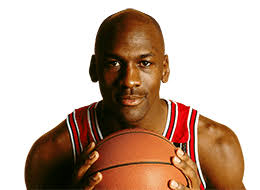

In [32]:
# Example with Michael Jordan stats
soup2 = getPage("https://stats.nba.com/player/893/career/")

[WDM] - Current google-chrome version is 81.0.4044
[WDM] - Get LATEST driver version for 81.0.4044


[WDM] - Driver [/home/must4in3/.wdm/drivers/chromedriver/linux64/81.0.4044.138/chromedriver] found in cache


In [33]:
# different way to scraping the webpabge, using CSS selector or tags
# Ex.1 - just columns name
columnas = [table.text.split() for table in soup2.select("thead")]
# Ex.2 - all value in the table
lenght = [table.text.split() for table in soup2.select("tbody")]
row = [table.text.split() for table in soup2.select("tbody > tr")]
# I use the years variable to store the information of the athlete's years of activity, 
#which is different for each athlete. This way I can create a generic scraping that works for most players
years = len(lenght[1])
print(years)

15


In [34]:
columnas_tabla1_carrer =columnas[0]
columnas_tabla2_carrer =columnas[2]
columnas_tabla3_carrer =columnas[4]
print(columnas_tabla3_carrer)

['Season', 'TEAM', 'AGE', 'GP', 'GS', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF']


In [35]:
# 3 dictionaries, each for each table
Career_Regular_Season_Stats  = dict()
Career_Playoffs_Stats = dict()
Career_All_Star_Stats = dict()
# clean the variable from unnecessary fields, to facilitate the process of creating dictionaries
new_row = []
for x in row:
    if len(x)>1:
        new_row.append(x)

In [36]:
creacolumnas(columnas_tabla1_carrer, Career_Regular_Season_Stats )
creafilas(new_row, 0, Career_Regular_Season_Stats )
#print(Career_Regular_Season_Stats)
creacolumnas(columnas_tabla2_carrer, Career_Playoffs_Stats )
creafilas(new_row, 1, Career_Playoffs_Stats )
#print(Career_Playoffs_Stats)
creacolumnas(columnas_tabla3_carrer, Career_All_Star_Stats )
creafilas(new_row, 2, Career_All_Star_Stats )
#print(Career_All_Star_Stats)

In [37]:
table1_carrer = pd.DataFrame(Career_Regular_Season_Stats)
table1_carrer.head()

,Season,TEAM,AGE,GP,GS,MIN,PTS,FGM,FGA,FG%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF
0,2002-03,WAS,40,82,67,36.9,20.0,8.3,18.6,44.5,...,4.0,82.1,0.9,5.2,6.1,3.8,1.5,0.5,2.1,2.1
1,2001-02,WAS,39,60,53,34.8,22.9,9.2,22.1,41.6,...,5.6,79.0,0.8,4.8,5.7,5.2,1.4,0.4,2.7,2.0
2,1997-98,CHI,35,82,82,38.8,28.7,10.7,23.1,46.5,...,8.8,78.4,1.6,4.2,5.8,3.5,1.7,0.5,2.3,1.8
3,1996-97,CHI,34,82,82,37.9,29.6,11.2,23.1,48.6,...,7.0,83.3,1.4,4.5,5.9,4.3,1.7,0.5,2.0,1.9
4,1995-96,CHI,33,82,82,37.7,30.4,11.2,22.6,49.5,...,8.0,83.4,1.8,4.8,6.6,4.3,2.2,0.5,2.4,2.4


In [38]:
table2_carrer = pd.DataFrame(Career_Playoffs_Stats)
table2_carrer.head()

,Season,TEAM,AGE,GP,GS,MIN,PTS,FGM,FGA,FG%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF
0,1997-98,CHI,35,21,21,41.5,32.4,11.6,25.0,46.2,...,10.6,81.2,1.6,3.5,5.1,3.5,1.5,0.6,2.1,2.2
1,1996-97,CHI,34,19,19,42.3,31.1,11.9,26.2,45.6,...,7.8,83.1,2.2,5.7,7.9,4.8,1.6,0.9,2.6,2.4
2,1995-96,CHI,33,18,18,40.7,30.7,10.4,22.6,45.9,...,10.4,81.8,1.7,3.2,4.9,4.1,1.8,0.3,2.3,2.7
3,1994-95,CHI,32,10,10,42.0,31.5,12.0,24.8,48.4,...,7.9,81.0,2.0,4.5,6.5,4.5,2.3,1.4,4.1,3.0
4,1992-93,CHI,30,19,19,41.2,35.1,13.2,27.8,47.5,...,8.9,80.5,1.7,5.1,6.7,6.0,2.1,0.9,2.4,3.1


In [39]:
table3_carrer = pd.DataFrame(Career_All_Star_Stats)
table3_carrer.head()

,Season,TEAM,AGE,GP,GS,MIN,PTS,FGM,FGA,FG%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF
0,1997-98,EST,35,1,1,32.0,23.0,10.0,18.0,55.6,...,3.0,66.7,1.0,5.0,6.0,8.0,3.0,0.0,2.0,0.0
1,1996-97,EST,34,1,1,26.0,14.0,5.0,14.0,35.7,...,7.0,57.1,3.0,8.0,11.0,11.0,2.0,0.0,3.0,4.0
2,1995-96,EST,33,1,1,22.0,20.0,8.0,11.0,72.7,...,4.0,100,1.0,3.0,4.0,1.0,1.0,0.0,0.0,1.0
3,1992-93,EST,30,1,1,36.0,30.0,10.0,24.0,41.7,...,13.0,69.2,3.0,1.0,4.0,5.0,4.0,0.0,6.0,5.0
4,1991-92,EST,29,1,1,31.0,18.0,9.0,17.0,52.9,...,0.0,0.0,1.0,0.0,1.0,5.0,2.0,0.0,1.0,2.0
